In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('royalties_cleaned.csv')
df['Sales Date'] = df['Sales Date'].astype('datetime64[ns]')

df.round(5).head()

,Sales Date,Quantity,Price,Subtotal,Album Name,Track Name,Partner Name,Transaction Type,Delivery Country
0,2017-08-15,7,0.00077,0.00541,Album_1,Track_1_1,Pandora,Stream,US
1,2017-08-15,1,0.00077,0.00077,Album_1,Track_1_2,Pandora,Stream,US
2,2017-08-15,2,0.00077,0.00155,Album_1,Track_1_3,Pandora,Stream,US
3,2017-08-15,40,0.00077,0.03094,Album_1,Track_1_4,Pandora,Stream,US
4,2017-08-15,36,0.00077,0.02785,Album_1,Track_1_5,Pandora,Stream,US


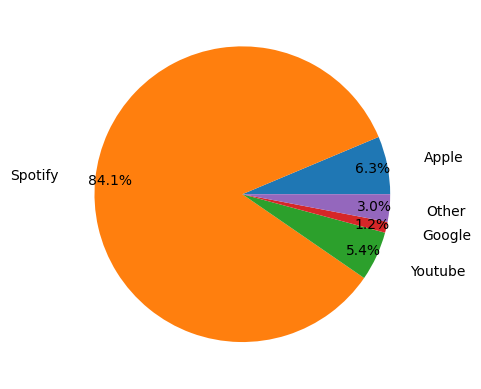

In [56]:
# Pie Chart
partners = df['Partner Name'].unique()

plays = []
for partner in partners:
    plays.append(sum(df[df['Partner Name'] == partner].Quantity))
    
plays.sort(reverse=True)
thresh = plays[3] # get top four services

plays_dict = {}
for partner in partners:
    cur_plays = sum(df[df['Partner Name'] == partner].Quantity)
    if cur_plays >= thresh:
        plays_dict[partner] = cur_plays

# Creat "other" category
rest = sum(plays[4:])
plays_dict['Other'] = rest

plt.pie(plays_dict.values(), labels=plays_dict.keys(), autopct='%1.1f%%',
       pctdistance=0.9, labeldistance=1.25)
plt.show()

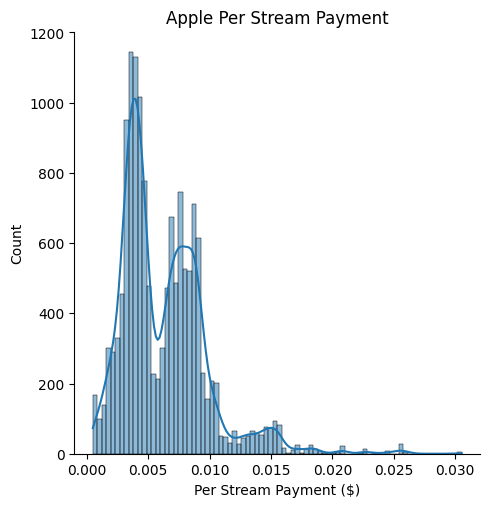

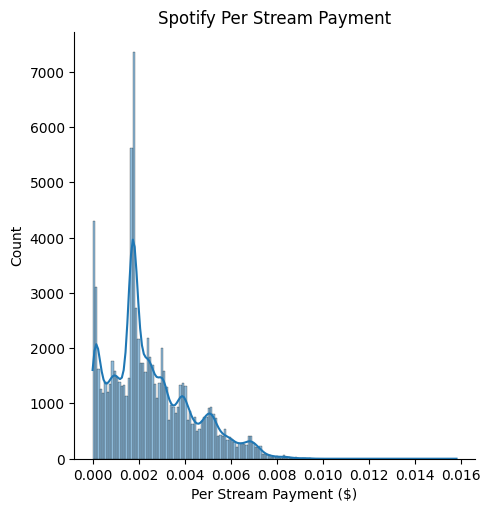

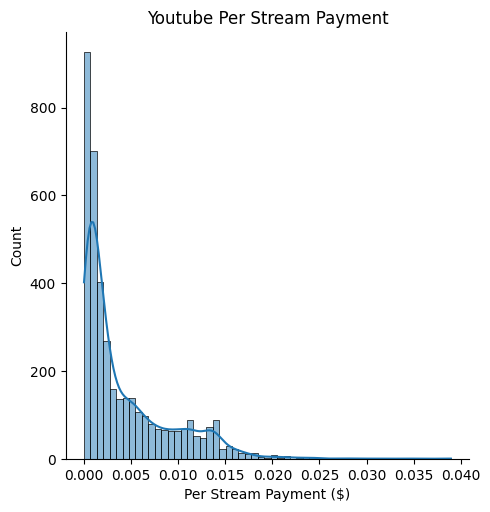

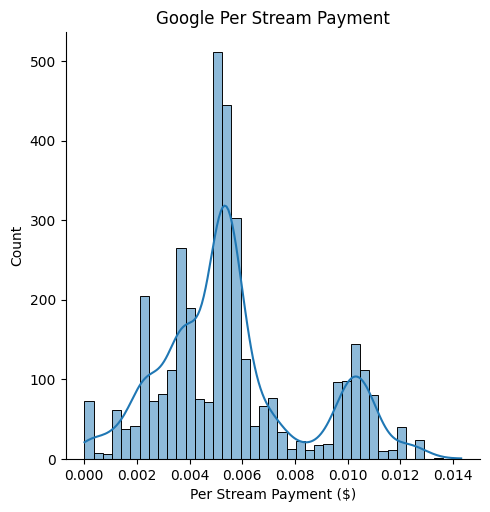

In [57]:
# Histograms of top services
top_partners = list(plays_dict.keys())
top_partners = top_partners[:-1]
top_partners

for partner in top_partners:
    sns.displot(df[df['Partner Name']==partner].Price, kde=True)
    plt.title(partner + ' Per Stream Payment')
    plt.xlabel('Per Stream Payment ($)')
    plt.show()

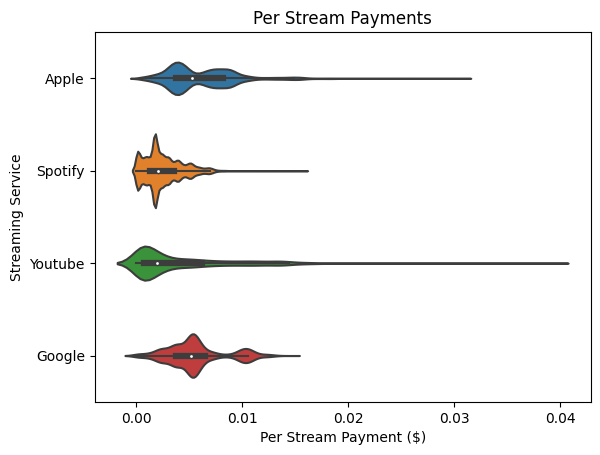

In [58]:
# Violin plots of top services
sns.violinplot(data=df[df['Partner Name'].isin(top_partners)],
               x='Price', y='Partner Name')
plt.title('Per Stream Payments')
plt.xlabel('Per Stream Payment ($)')
plt.ylabel('Streaming Service')
plt.show()

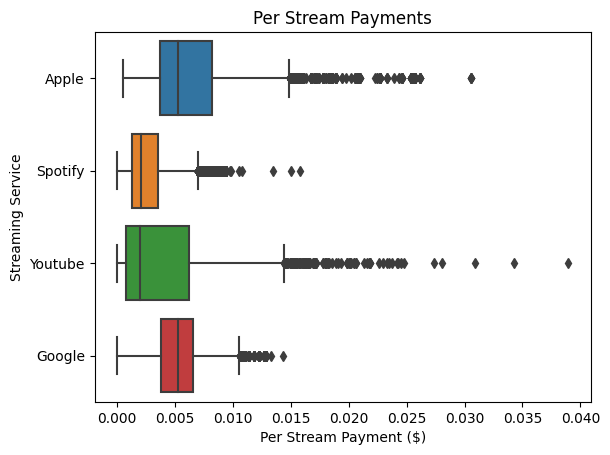

In [59]:
# Box plots of top services
sns.boxplot(data=df[df['Partner Name'].isin(top_partners)],
               x='Price', y='Partner Name')
plt.title('Per Stream Payments')
plt.xlabel('Per Stream Payment ($)')
plt.ylabel('Streaming Service')
plt.show()

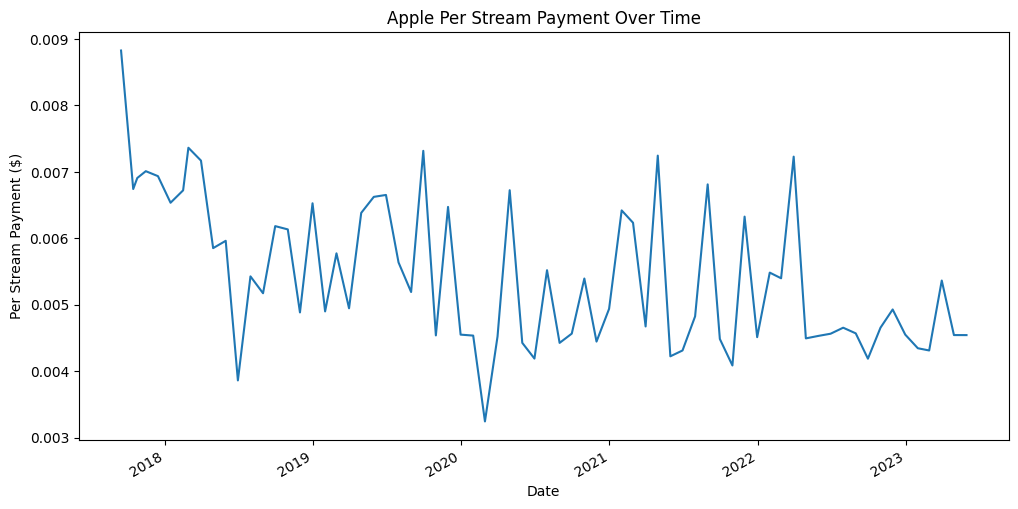

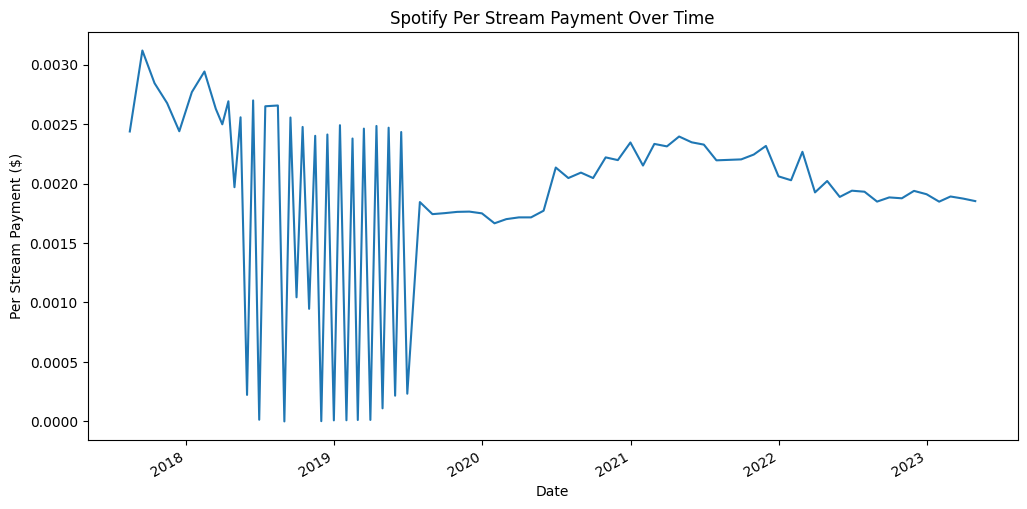

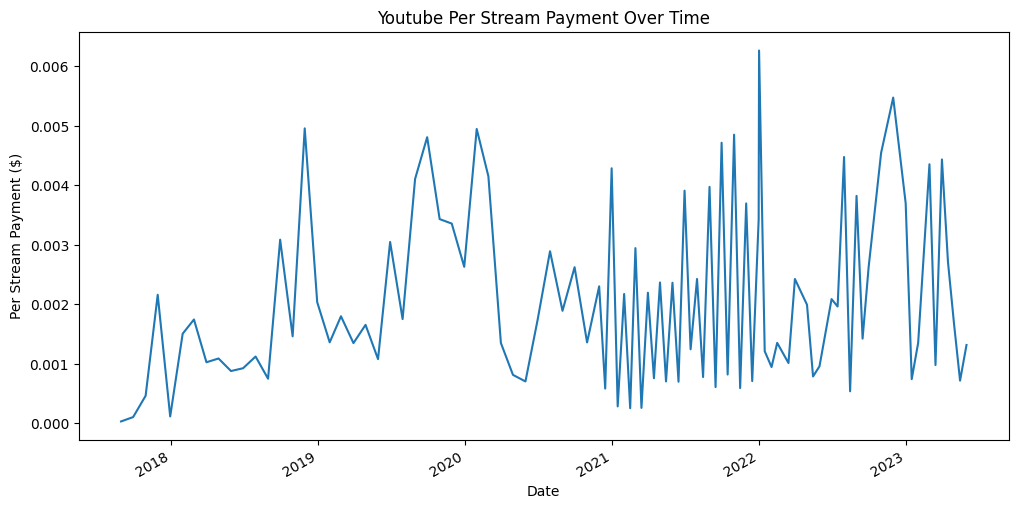

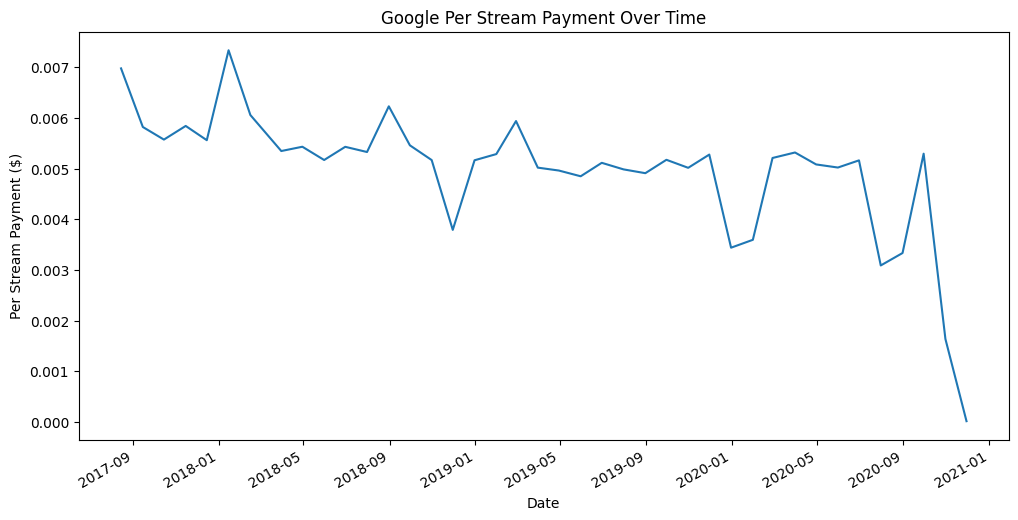

In [69]:
for partner in top_partners:
    cur_df = df[df['Partner Name']==partner]
    plt.figure(figsize=(12, 6))
    cur_df.groupby('Sales Date').Price.median().plot()
    plt.title(partner + ' Per Stream Payment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Per Stream Payment ($)')
    plt.show()

In [65]:
spotify = df[df['Partner Name']=='Spotify']
pd.set_option('display.max_rows', None)
x = spotify.groupby('Sales Date').Price.median()
x
# for date in spotify['Sales Date'].unique:
#     spotify


Sales Date
2017-08-15    2.437890e-03
2017-09-15    3.118570e-03
2017-10-15    2.843750e-03
2017-11-15    2.676310e-03
2017-12-15    2.439710e-03
2018-01-15    2.769130e-03
2018-02-15    2.942030e-03
2018-03-15    2.628080e-03
2018-03-31    2.498093e-03
2018-04-15    2.691780e-03
2018-04-30    1.969365e-03
2018-05-15    2.557100e-03
2018-05-31    2.230528e-04
2018-06-15    2.699060e-03
2018-06-30    1.442800e-05
2018-07-15    2.649920e-03
2018-08-15    2.656290e-03
2018-08-31    7.540000e-08
2018-09-15    2.555280e-03
2018-09-30    1.043696e-03
2018-10-15    2.476110e-03
2018-10-31    9.468722e-04
2018-11-15    2.401490e-03
2018-11-30    2.318900e-06
2018-12-15    2.412410e-03
2018-12-31    8.977900e-06
2019-01-15    2.490670e-03
2019-01-31    9.786800e-06
2019-02-15    2.378740e-03
2019-02-28    1.205870e-05
2019-03-15    2.462005e-03
2019-03-31    1.261270e-05
2019-04-15    2.484300e-03
2019-04-30    1.102153e-04
2019-05-15    2.469740e-03
2019-05-31    2.164999e-04
2019-06-15    2.4